<a href="https://colab.research.google.com/github/MFairuziIszamAziz/APMProjectKel8A/blob/main/P1/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
from utils import load_data

# This function creates randomly generated data
# X, y = load_data(6000)

# For stability, load data from files that were generated using the load_data
X = pd.read_csv('X_data.csv',index_col=0)
y_df = pd.read_csv('y_data.csv',index_col=0)
y = y_df['y']

In [63]:
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [64]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

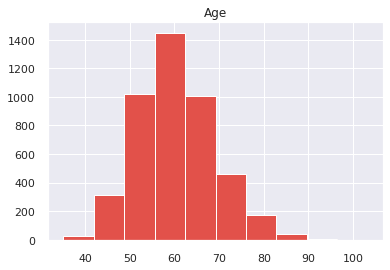

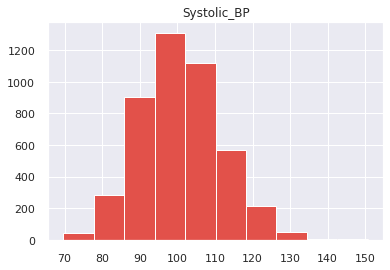

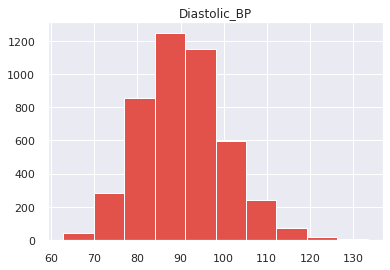

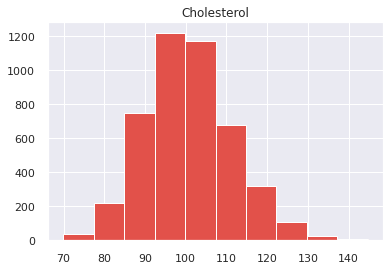

In [66]:
for col in X.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

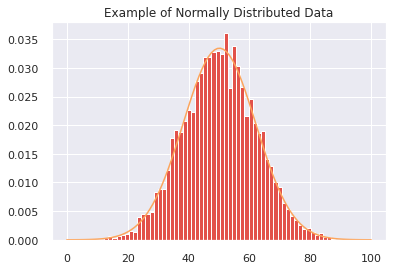

In [67]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

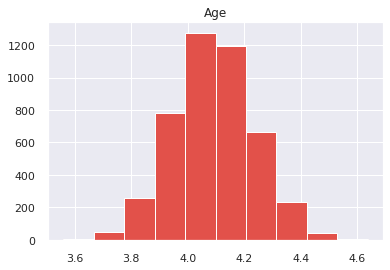

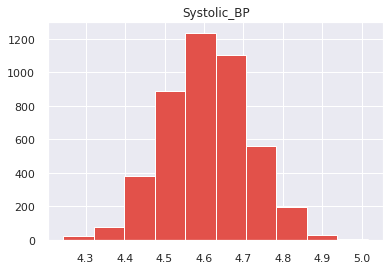

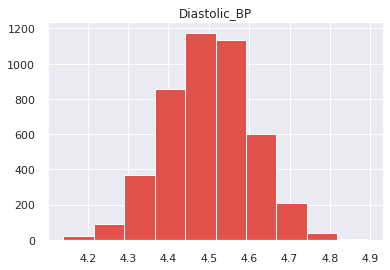

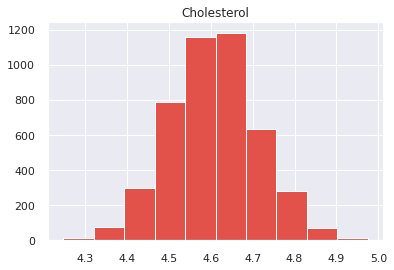

In [68]:
for col in X_train_raw.columns:
    np.log(X_train_raw.loc[:, col]).hist()
    plt.title(col)
    plt.show()

In [69]:
def make_standard_normal(df_train, df_test):

    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)
    
    #calculate the mean and standard deviation of the training set
    mean = df_train_unskewed.mean(axis=0)
    stdev = df_train_unskewed.std(axis=0)
    
    # standardize the training set
    df_train_standardized = (df_train_unskewed - mean)/stdev
    
    df_test_standardized = (df_test_unskewed - mean)/stdev
    
    return df_train_standardized, df_test_standardized

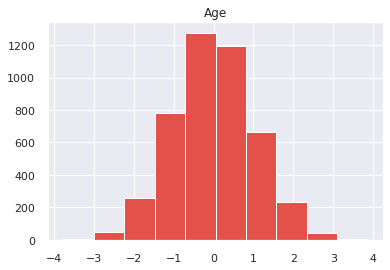

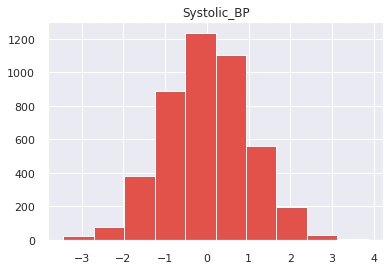

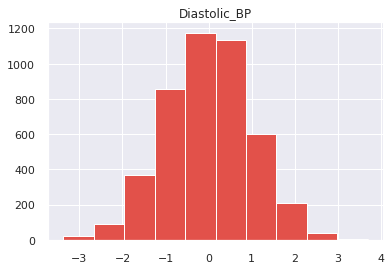

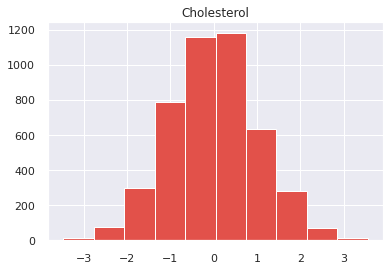

In [71]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

In [72]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def lr_model(X_train, y_train):
    # import the LogisticRegression class
    from sklearn.linear_model import LogisticRegression
    
    # create the model object
    model = LogisticRegression()
    
    # fit the model to the training data
    model.fit(X_train, y_train)
    
    #return the fitted model
    return model

In [73]:
model_X = lr_model(X_train, y_train)

In [74]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def cindex(y_true, scores):
    '''

    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
        0: patient does not get the disease
        1: patient does get the disease
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    '''
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0
    # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n): #choose the range of j so that j>i
            
            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible += 1

                # For permissible pairs, check if they are concordant or are ties
#                 if (y_true[i] == 1 and y_true[j] == 0) or (y_true[i] == 0 and y_true[j] == 1):
#                     if scores[i] > scores[j]:
#                         concordant += 1
#                     if scores[j] > scores[i]:
#                         concordant += 1
#                     if scores[i] == scores[j]:
#                         ties += 1
                # check for ties in the score
                if scores[i] == scores[j]:
                    # count the tie
                    ties += 1
                    # if it's a tie, than no need to check patient outcomes, continue to the top of the for loop.
                    continue

                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower risk score than patient j
                    if scores[j] > scores[i]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair.
                    # Already checked for ties earlier

                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        #count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair.
                    # I already checked for ties earlier

    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs.
    c_index = (concordant + 0.5*ties)/permissible
    
    return c_index

In [75]:
scores = model_X.predict_proba(X_test)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.8182


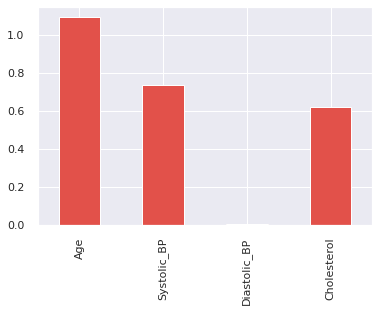

In [76]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None);